HR Analytics Project- Understanding the Attrition in HR
Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('/Users/khushbu/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [20]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [34]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [47]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

there is no nul in dataset

In [49]:
# splitting the data into numeric features and categorical ones
# printing the length of each list
numeric_col =  df.select_dtypes(include=['number'])
categorial_col =  df.select_dtypes(include=['object'])
print(f"Number of numeric features = {len(numeric_col.columns)}")
print(f"Number of categorical features = {len(categorial_col.columns)}")

Number of numeric features = 26
Number of categorical features = 9


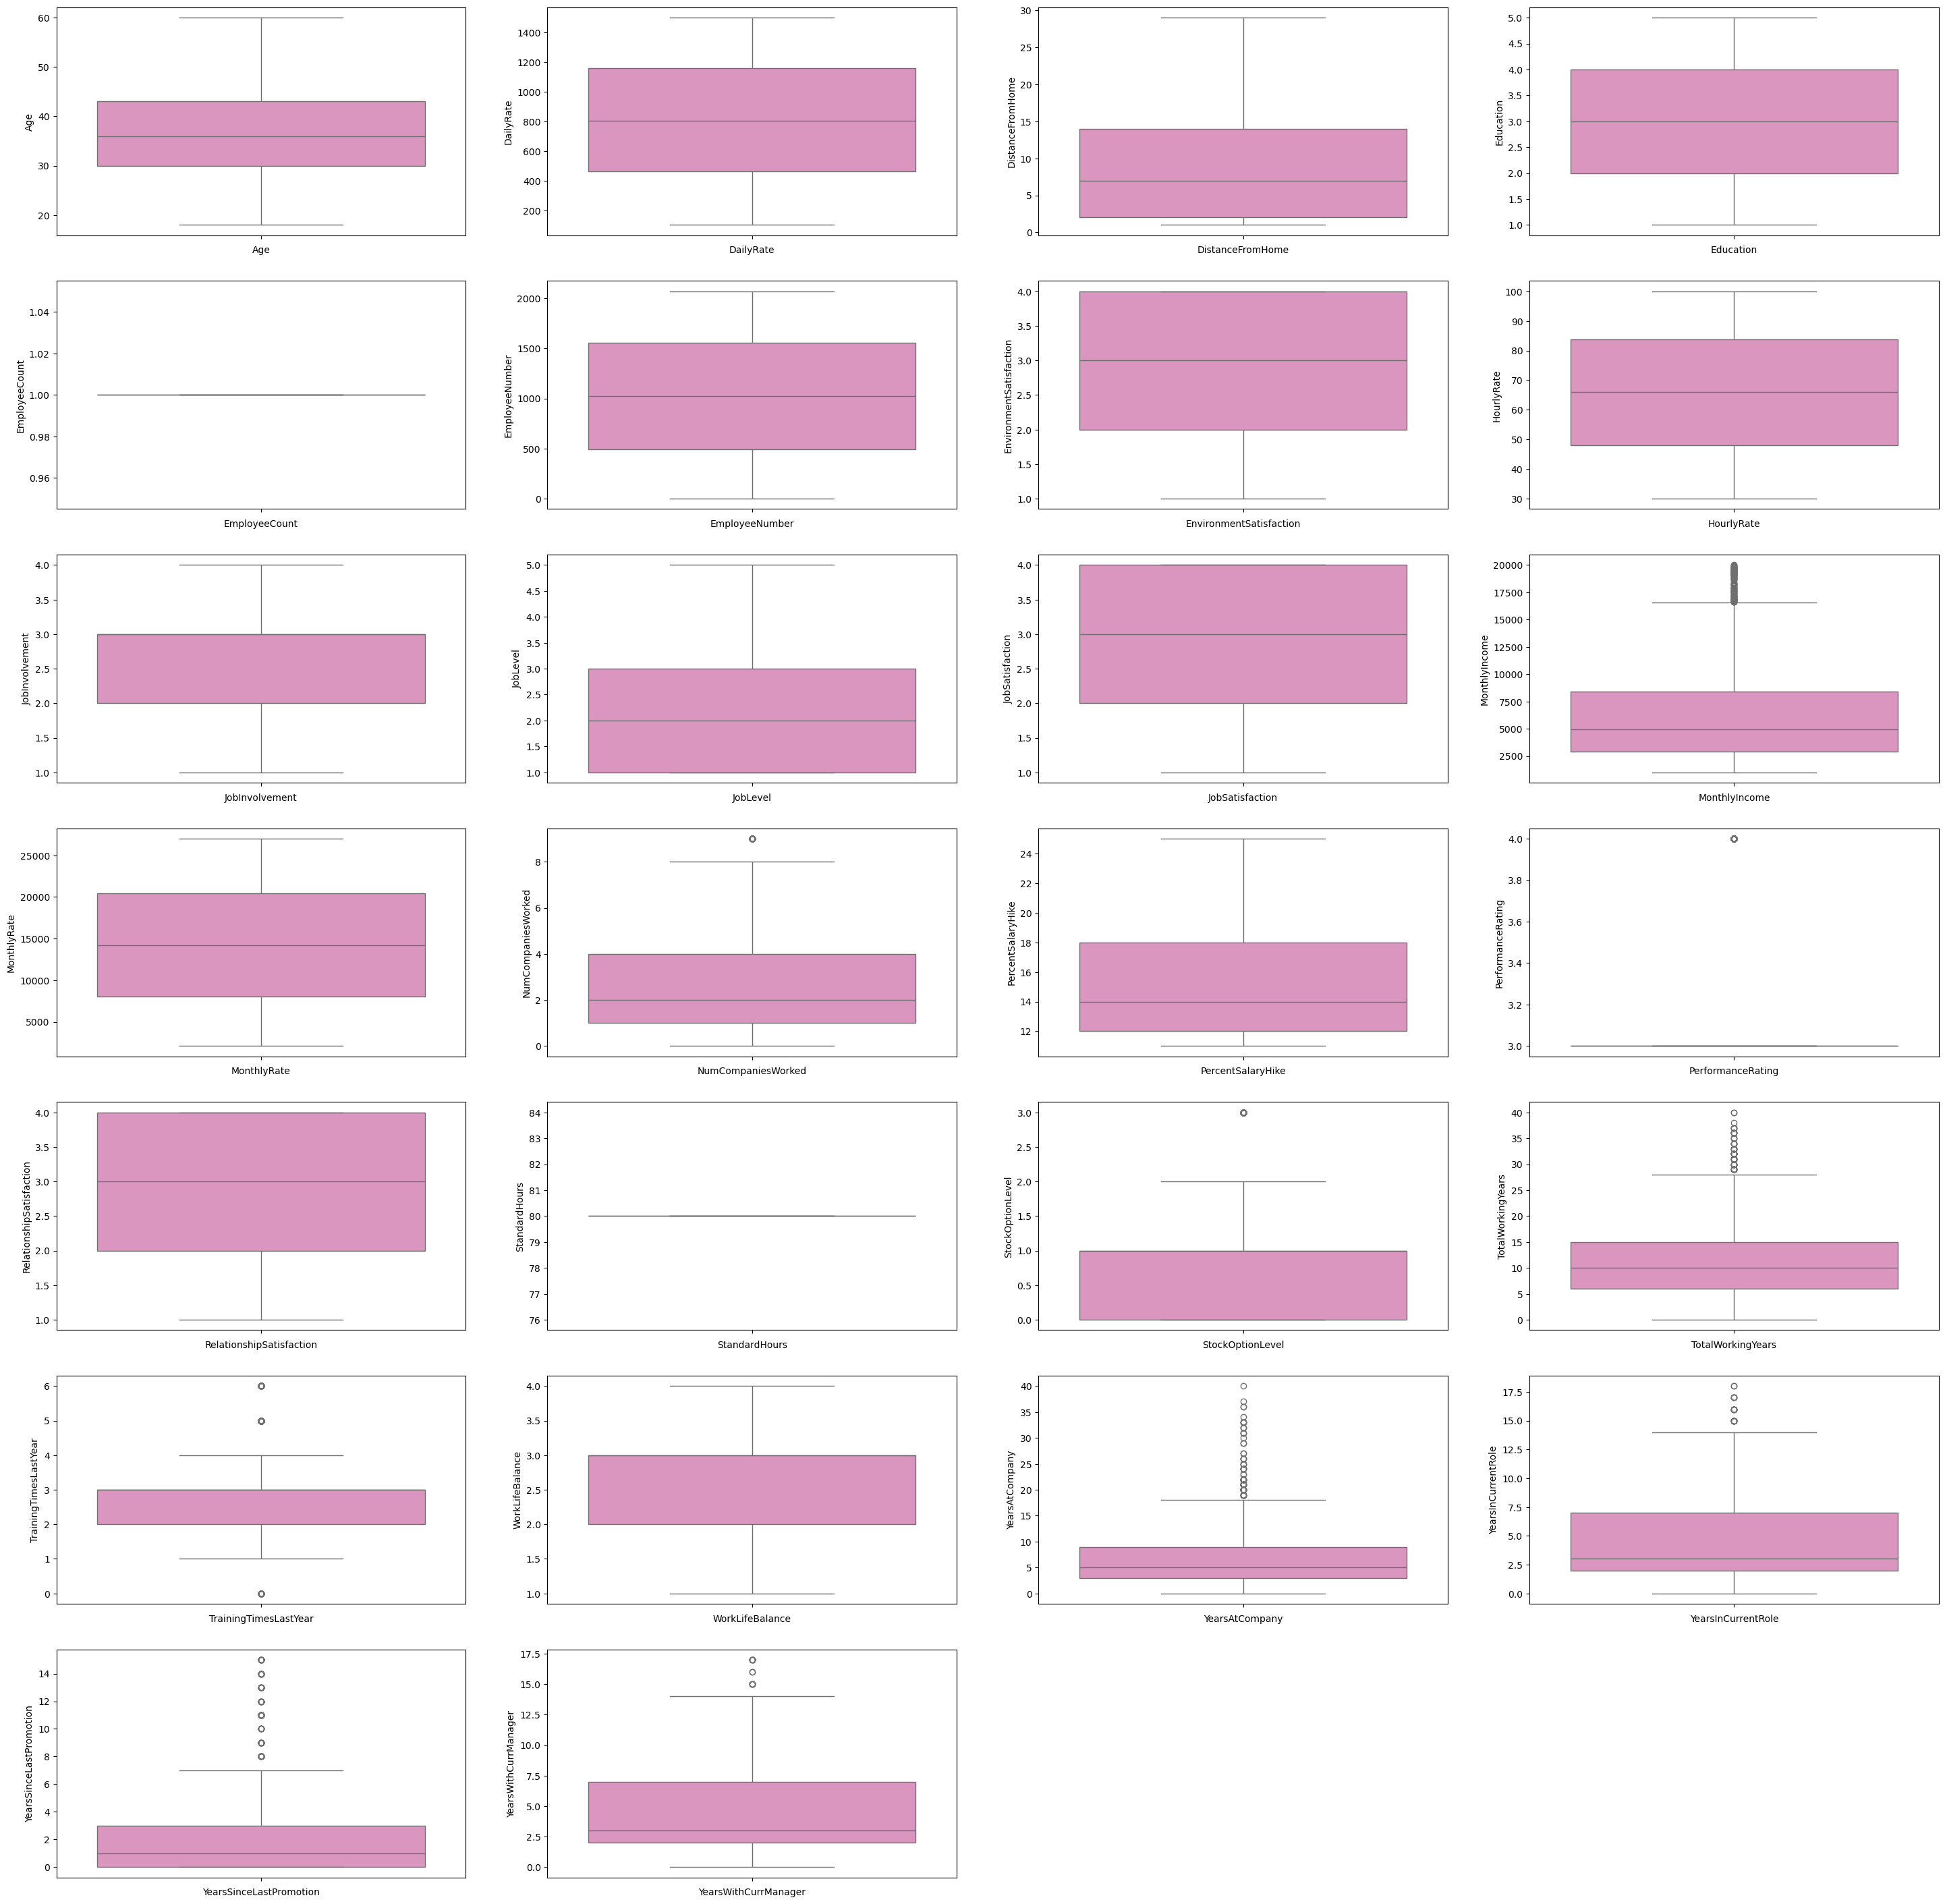

In [51]:
plt.figure(figsize=(36,36))
n=1
for i in numeric_col:
    if n<=27:
        plt.subplot(7,4,n)
        sns.boxplot(numeric_col[i],palette="Set2_r")
        plt.xlabel(i)
    n+=1
plt.show()

monthlyincome,numcompaniesworked,perfomancerating,stockoptionlevel,totalworkingyears,TrainingTimeslastYear,YearsAtcompany,yearsincurrentrole,yearsSinceLastPromotion,yearswithcurrmanager all this coumns has outliers

<Axes: >

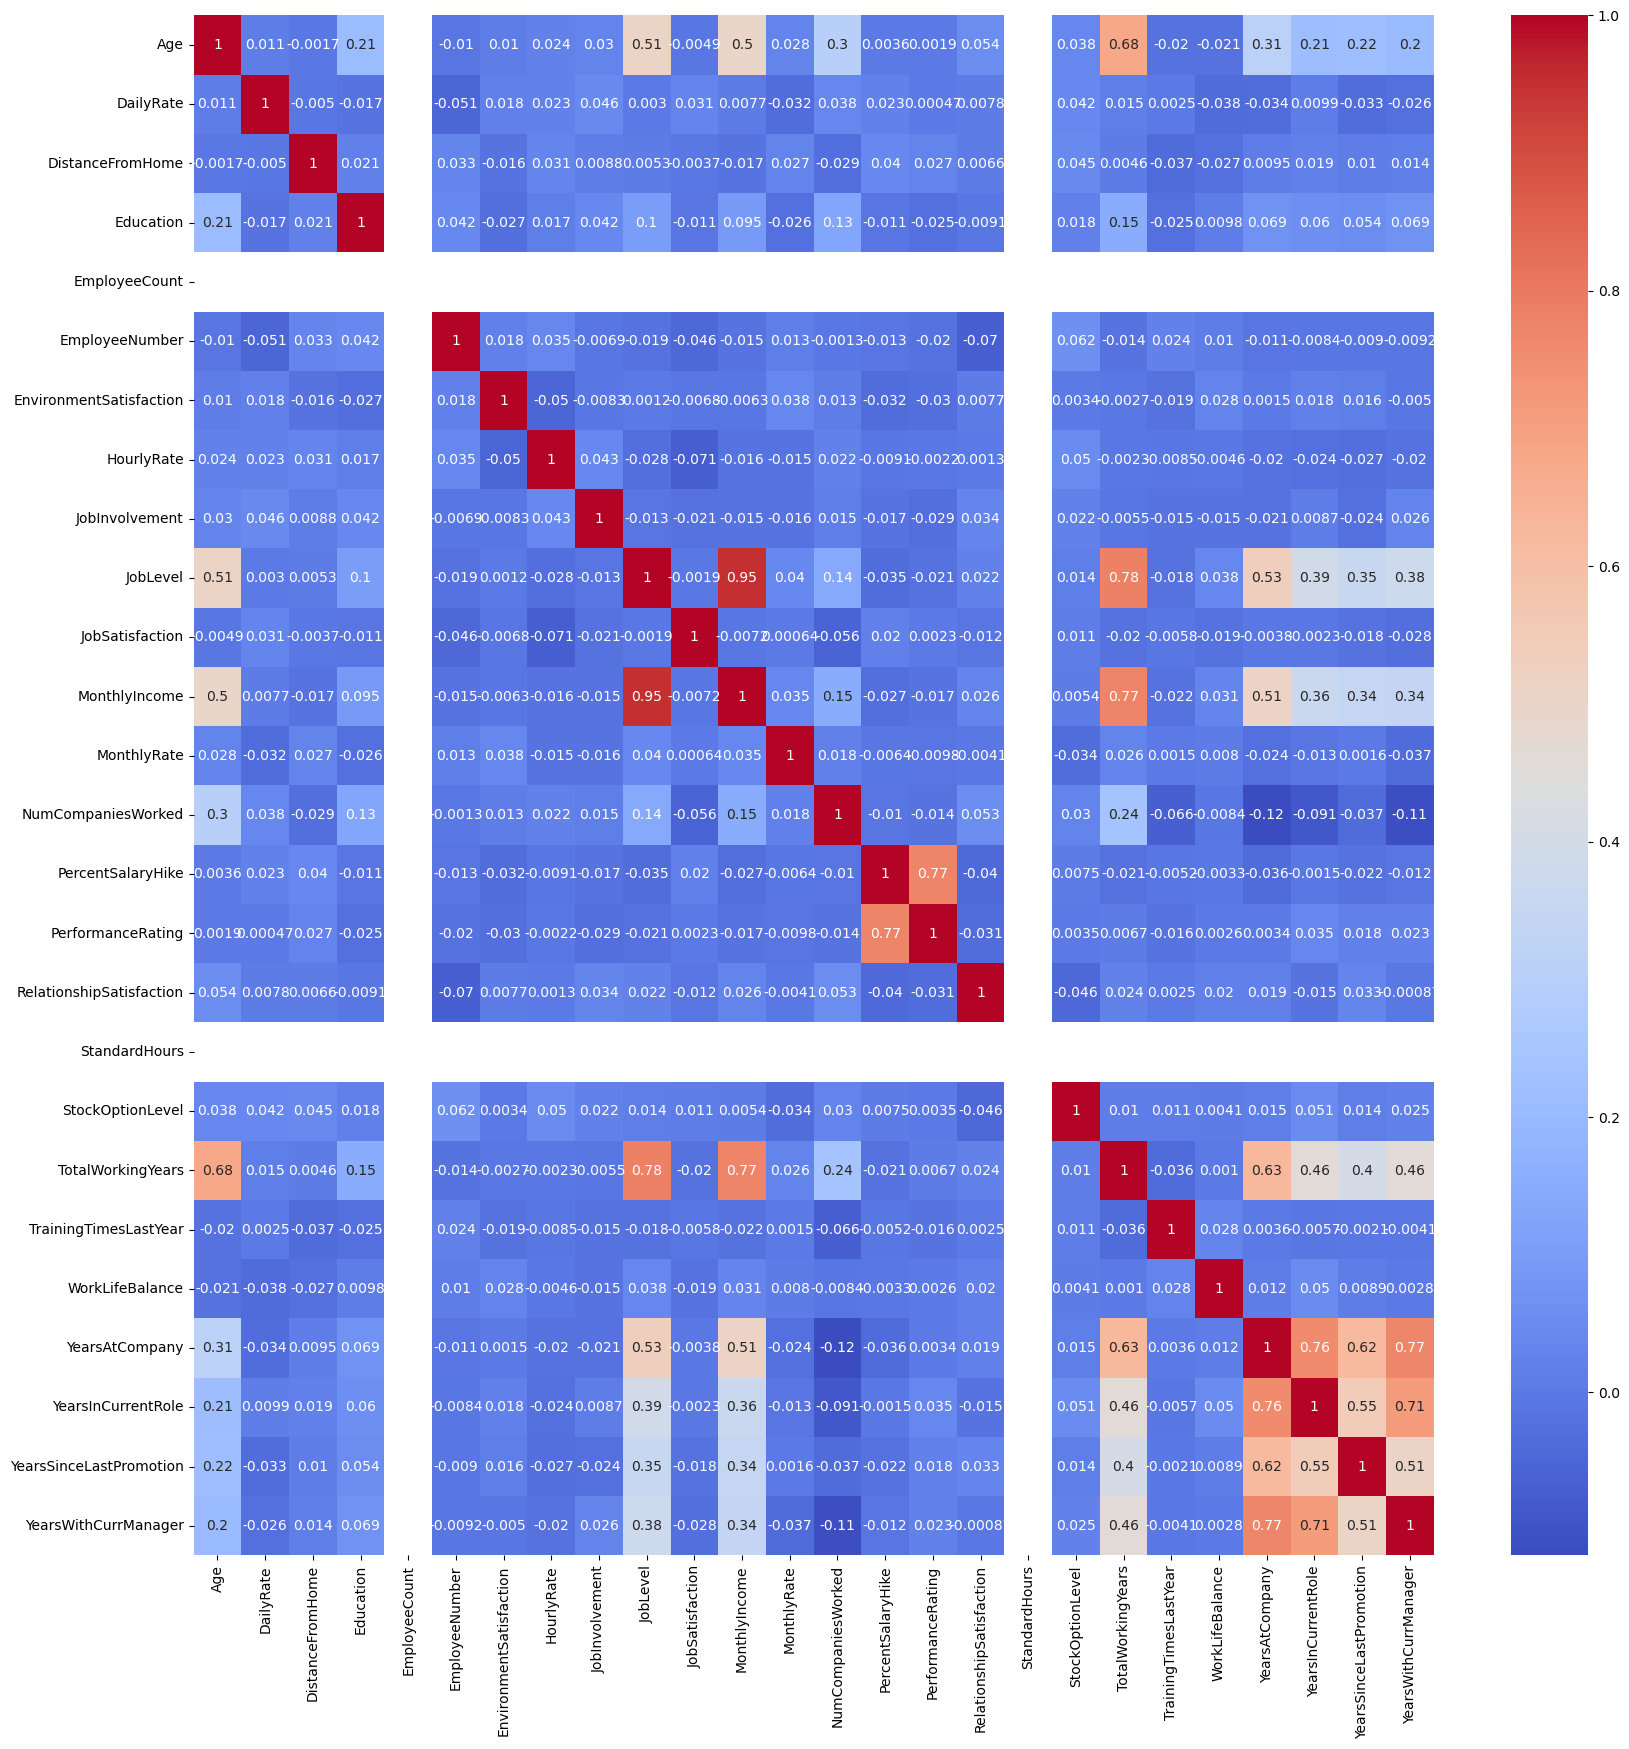

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(numeric_col.corr(),cmap='coolwarm',annot=True)

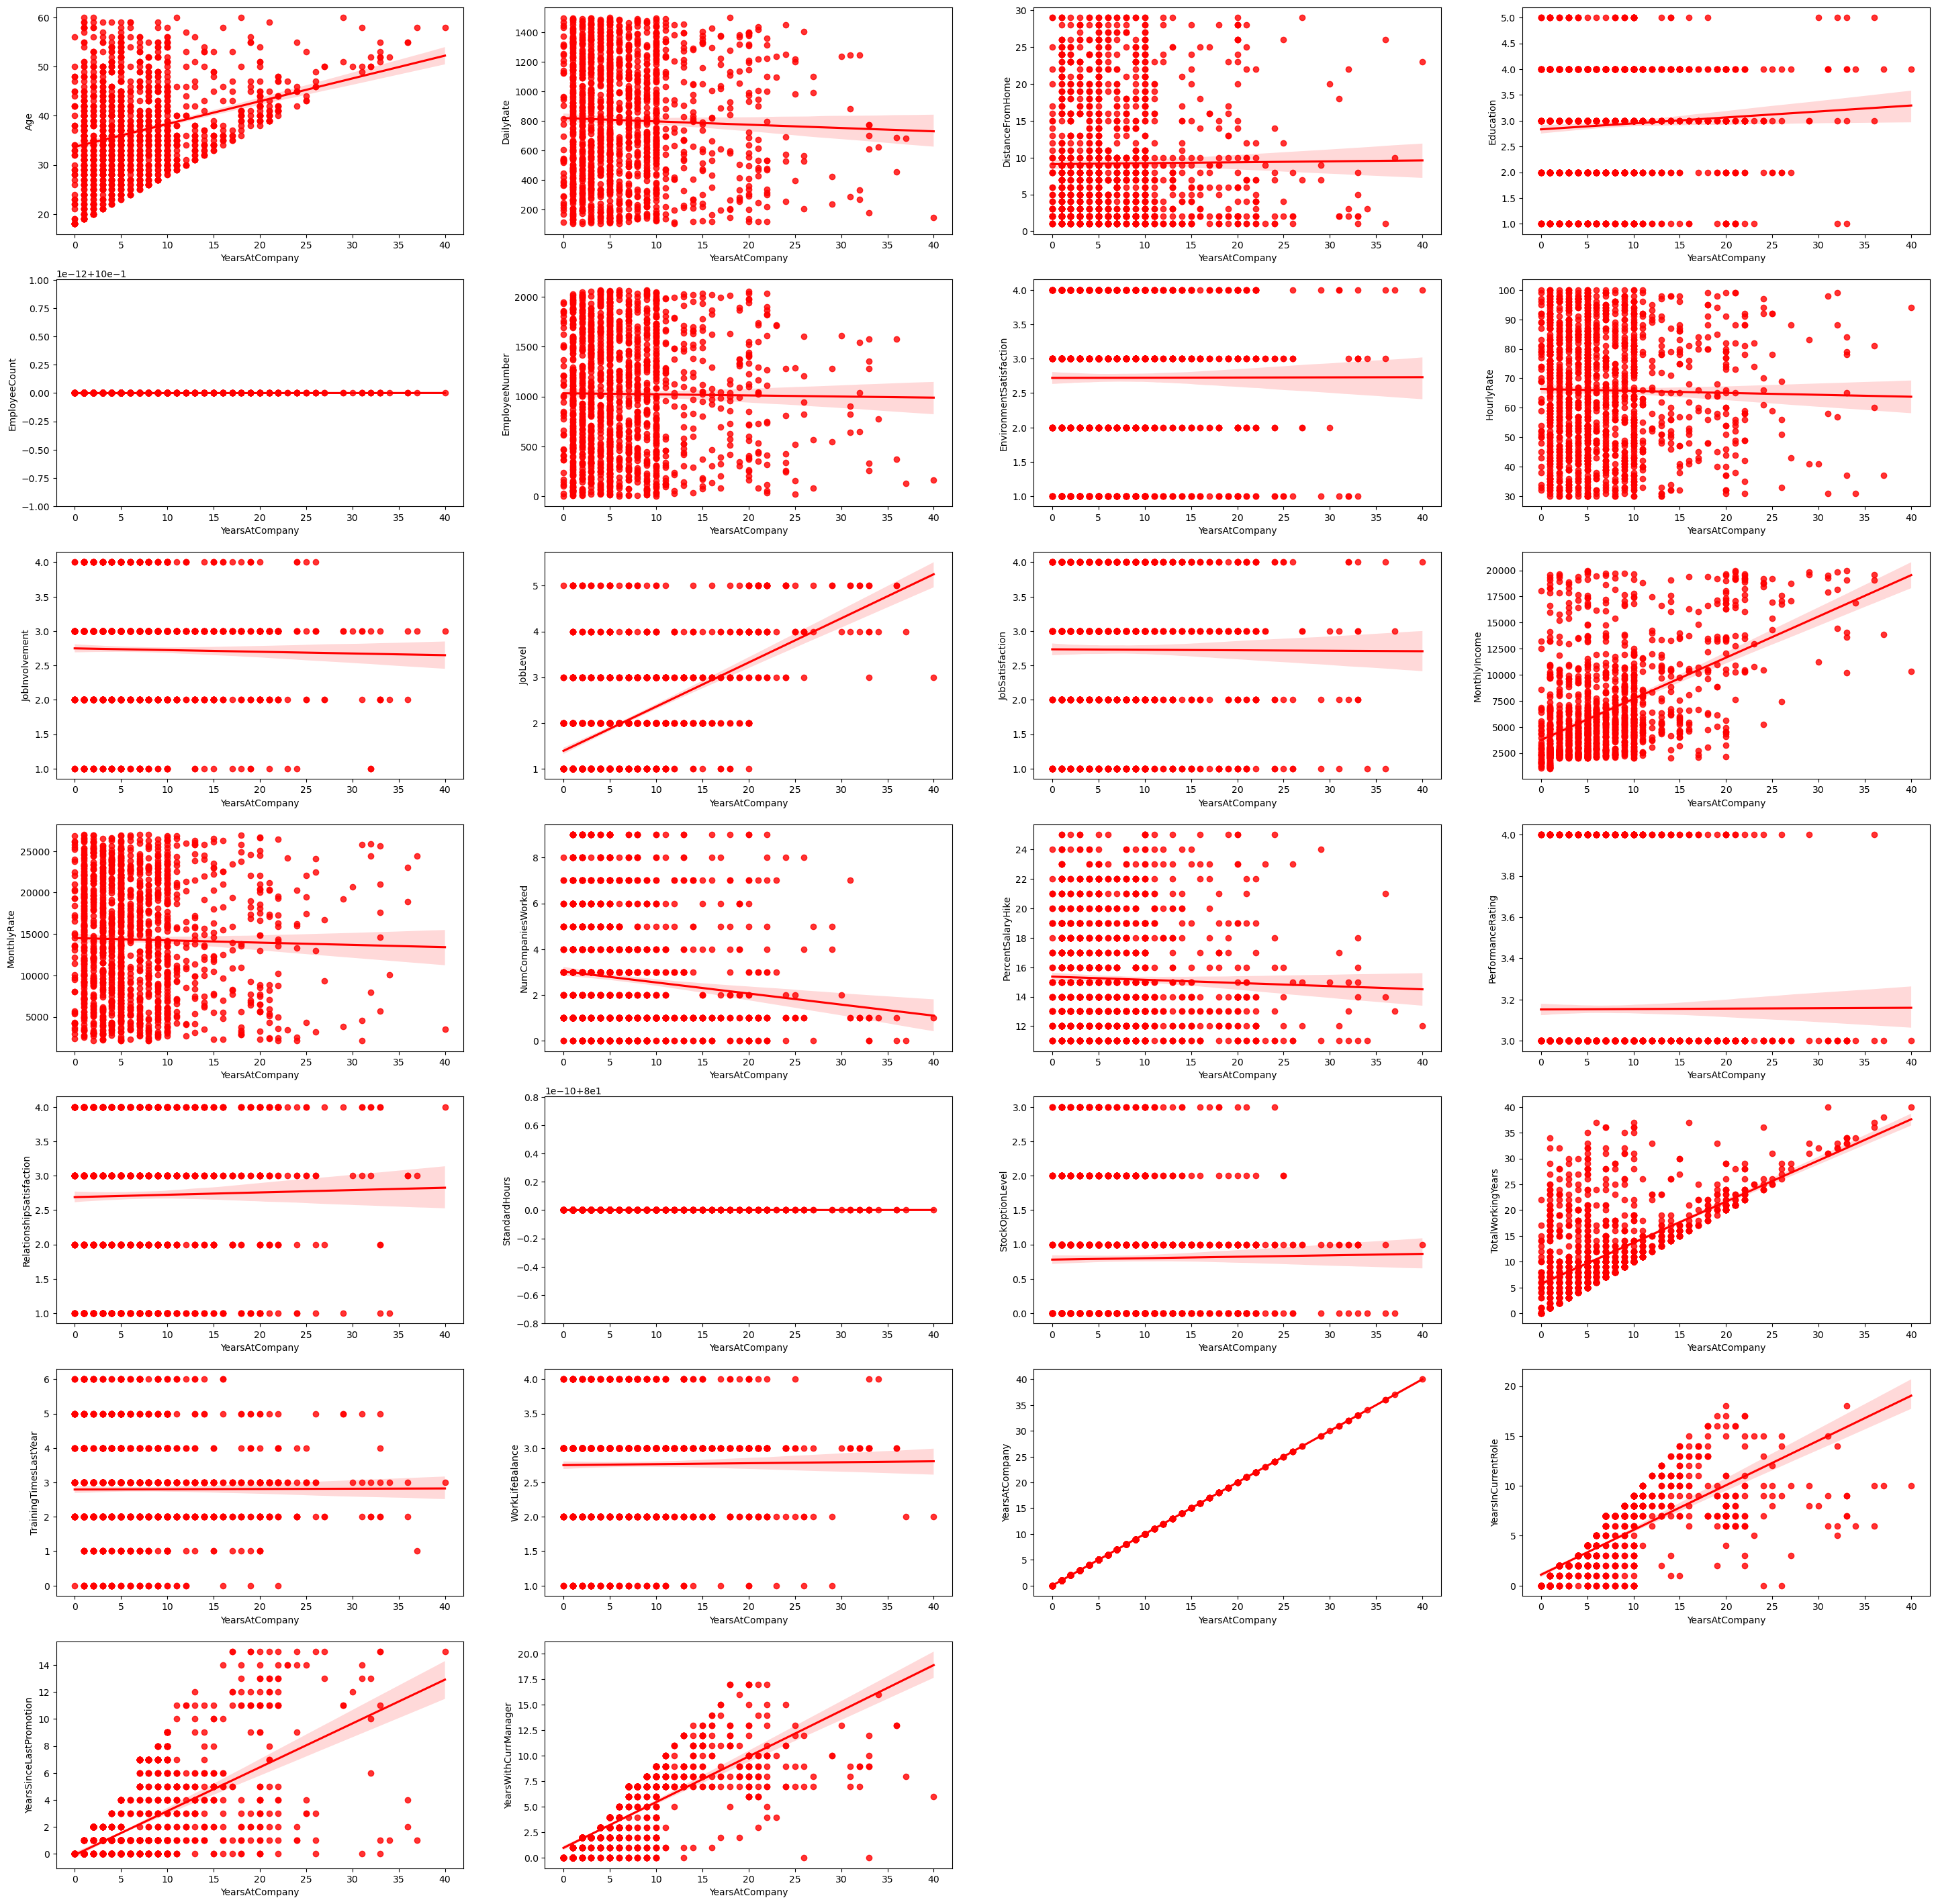

In [74]:
plt.figure(figsize=(36,36))
p=1
for i in numeric_col:
    if p<=27:
        plt.subplot(7,4,p)
        sns.regplot(x='YearsAtCompany',y=i,data=numeric_col,color='r')
        #sns.lmplot(data=df1,x='Happiness Score',y=i,palette='colorblind')
        plt.xlabel("YearsAtCompany")
        plt.ylabel(i)
    p+=1
plt.show()

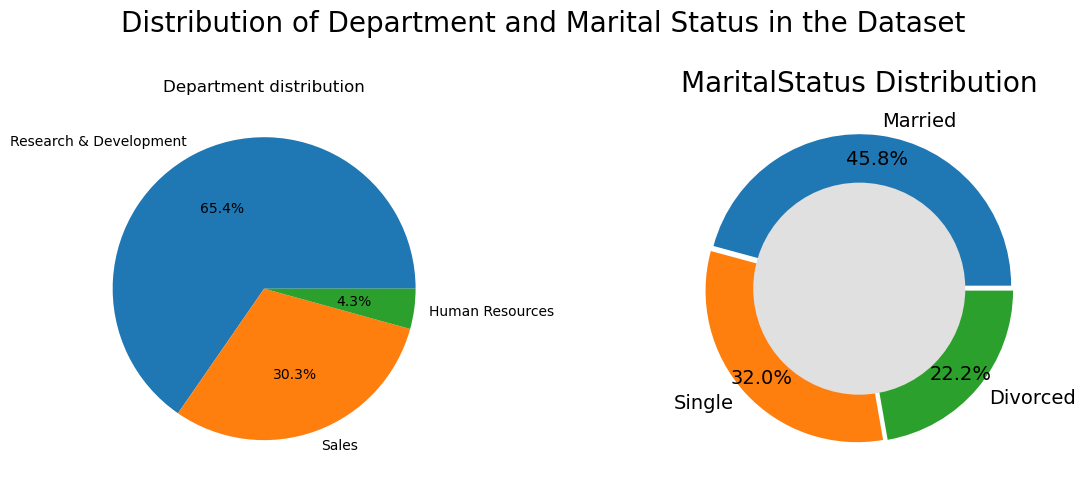

In [76]:
plt.figure(figsize=(12,5))
plt.suptitle("Distribution of Department and Marital Status in the Dataset", fontsize=20)
plt.subplot(1,2,1)
gender_counts = df['Department'].value_counts()
plt.pie(gender_counts,labels=gender_counts.index , autopct='%1.1f%%')
plt.title("Department distribution")

plt.subplot(1,2,2)

marital_counts = df['MaritalStatus'].value_counts()
plt.style.use('fivethirtyeight')
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', pctdistance=0.85, explode=(.02, .02, .02))

centre_circle = plt.Circle((0,0),0.70,fc='#e0e0e0')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("MaritalStatus Distribution")
plt.tight_layout()
plt.show()

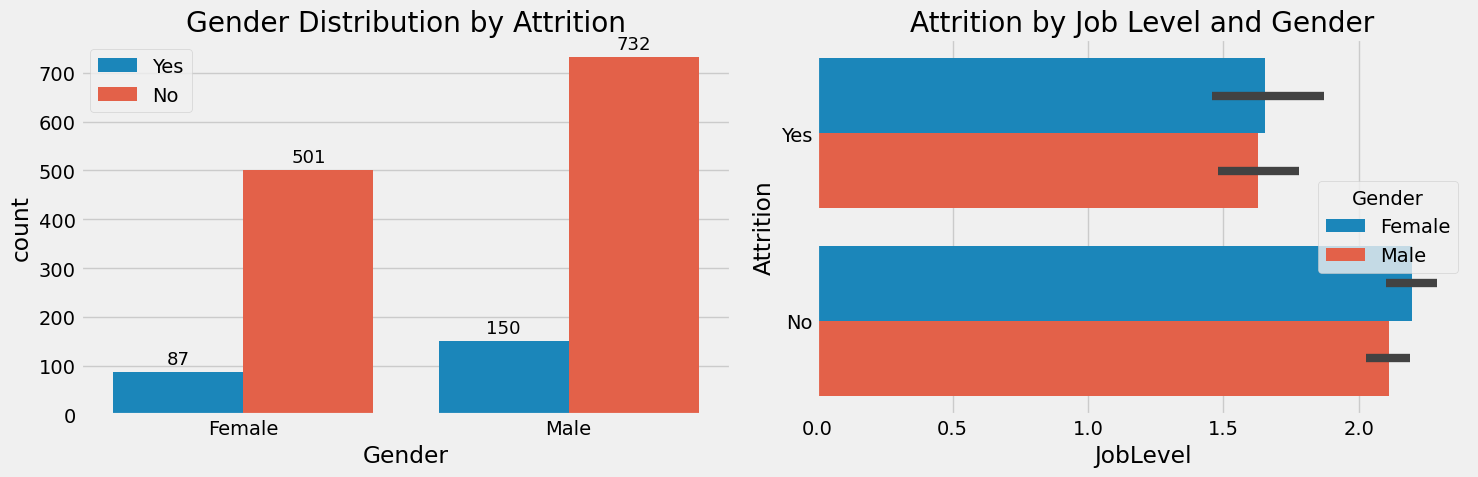

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

palette = {"Yes": "#e2644c", "No": "#2a6a8b"}

bar = sns.countplot(ax=axes[0], x='Gender', data=df, hue='Attrition')
axes[0].set_title('Gender Distribution by Attrition')
for container in bar.containers:
    bar.bar_label(container, labels=[f'{int(label.get_height())}' for label in container],
                  label_type='edge', color='k', fontsize=13, padding=3)
axes[0].legend(loc='upper left')

sns.barplot(ax=axes[1], x='JobLevel', y='Attrition', hue='Gender', data=df)
axes[1].set_title('Attrition by Job Level and Gender')

plt.tight_layout()
plt.show()

## atrrition in male and female geneder has not much difference in attrition  but there is more attrition in lower level as job level increasze attrition decrease

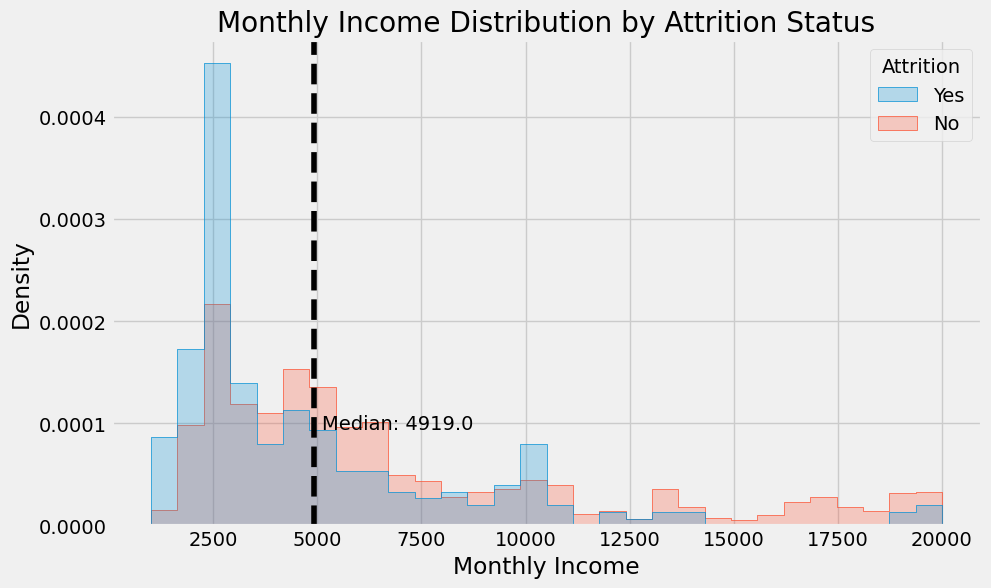

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=False,
             element='step', stat="density", common_norm=False, bins=30)

plt.axvline(df['MonthlyIncome'].median(), color='black', linestyle='--')
plt.text(df['MonthlyIncome'].median()+200, 0.0001, f'Median: {df["MonthlyIncome"].median()}',
         color='black', ha='left', va='center')

plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.show()

## income also create major role in attrition with lower income attrition is high as income increase attrition decrease

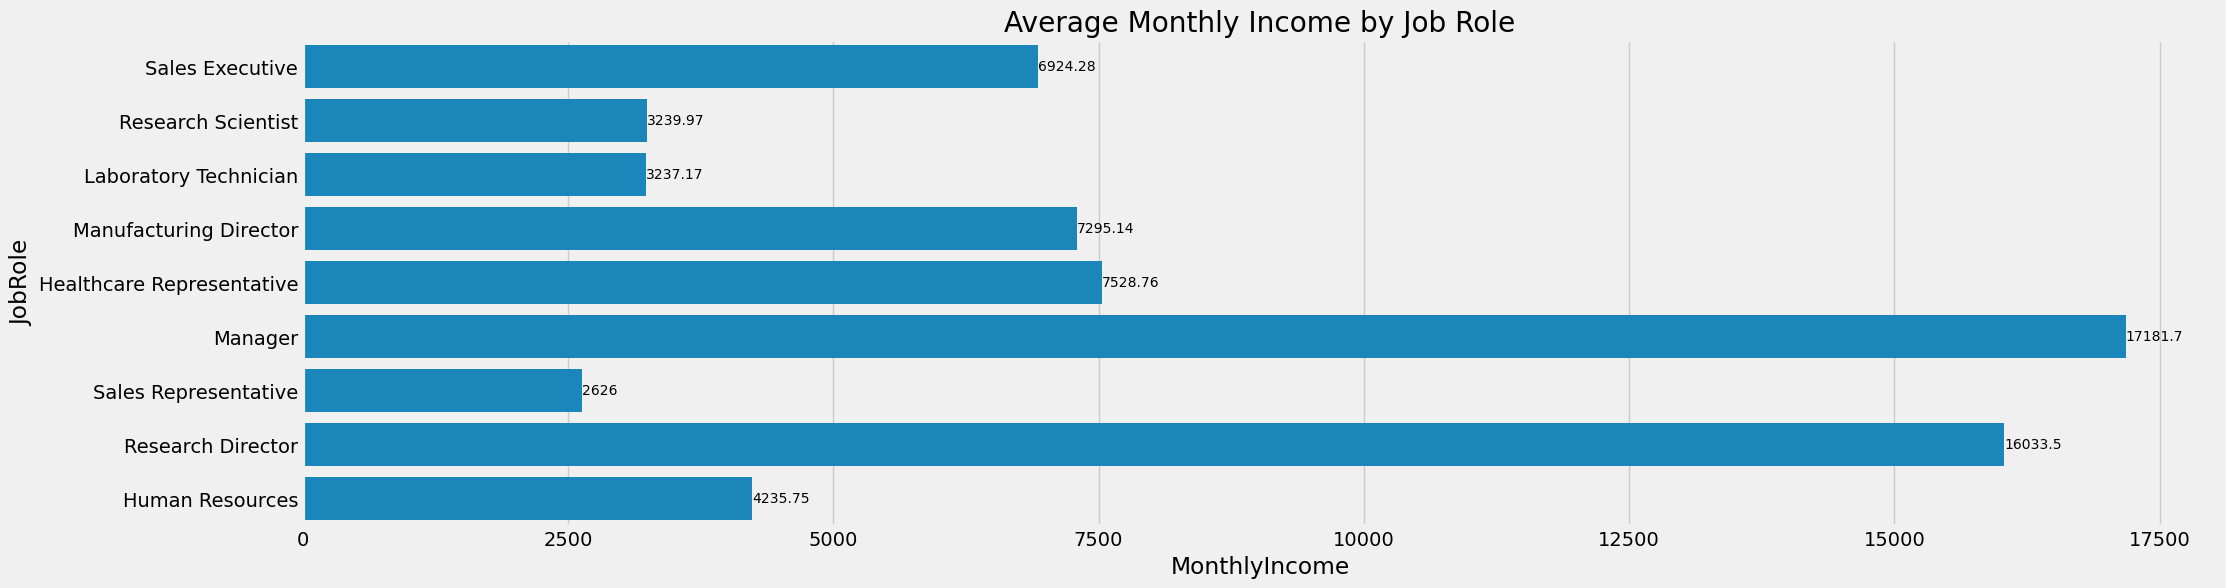

In [84]:
plt.figure(figsize=(22,6))
ax = sns.barplot(data=df, x='MonthlyIncome', y='JobRole', estimator="mean", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Average Monthly Income by Job Role")
plt.show()

## from above we can say on manager and director position has very low attrition and on technician,Reasearch scientist and salesrepresantative  will havemore attrition rate

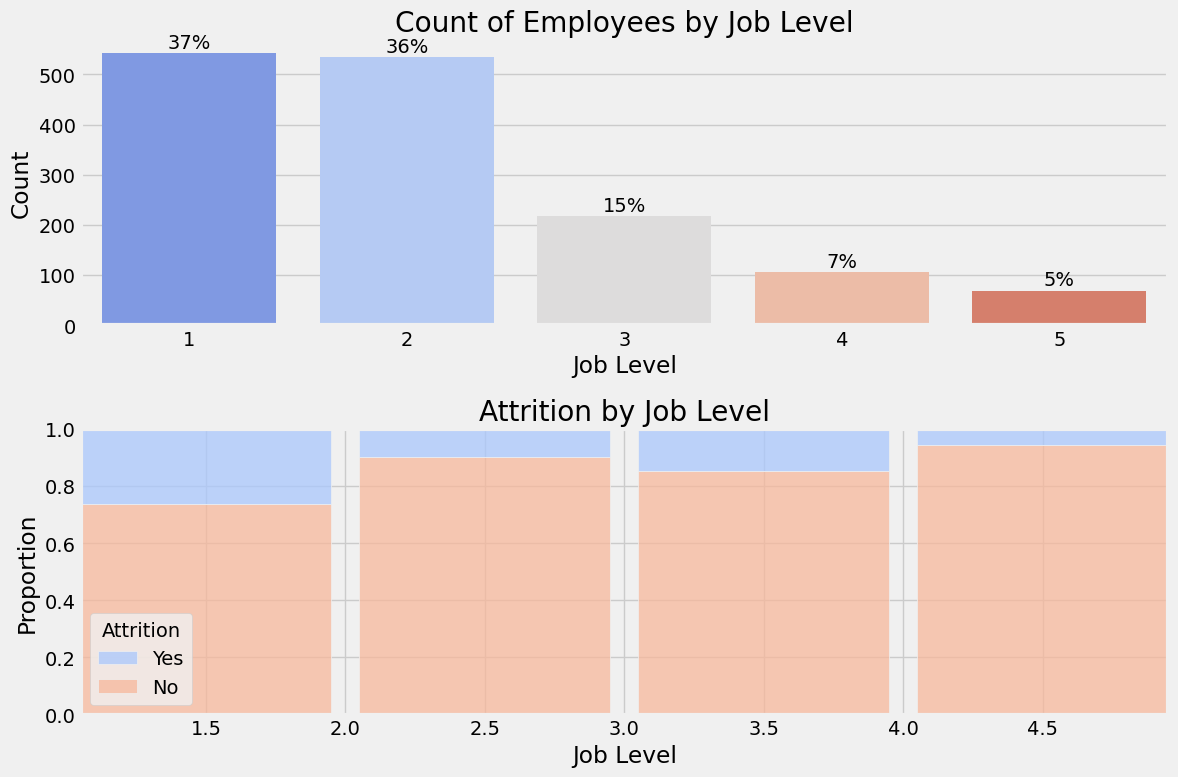

In [86]:
plt.figure(figsize=(12, 8))

# plot 1
plt.subplot(2, 1, 1)
sns.countplot(data=df, x='JobLevel', palette='coolwarm')
plt.title('Count of Employees by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Count')

# Annotate the percentage on top of bars
job_level_counts = df['JobLevel'].value_counts(normalize=True).sort_index()
for i, pct in enumerate(job_level_counts):
    plt.text(i, df['JobLevel'].value_counts().iloc[i] + 10, f'{pct:.0%}', ha='center')

# Bottom plot: Attrition by job level
plt.subplot(2, 1, 2)
sns.histplot(
    data=df, x='JobLevel', hue='Attrition', multiple='fill',
    palette='coolwarm', binwidth=1, stat='proportion',shrink=0.9
)

plt.title('Attrition by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Proportion')

# Show the plots
plt.tight_layout()
plt.show()

## as job level increase employee count decrese and attrition also decrease

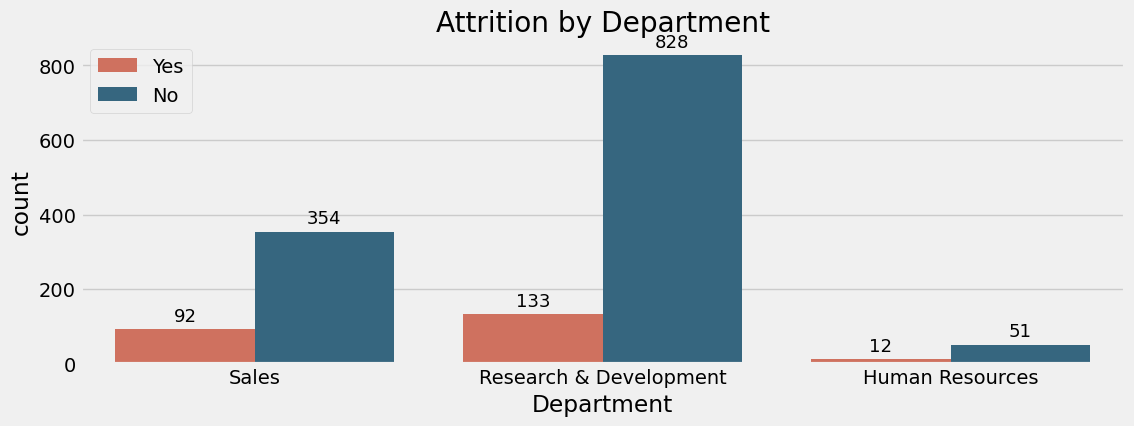

In [88]:
plt.figure(figsize=(12, 4))
palette = {"Yes": "#e2644c", "No": "#2a6a8b"}
bar = sns.countplot(x='Department',data=df,hue='Attrition',palette=palette)
for container in bar.containers:
    bar.bar_label(container,labels=[f'{int(label.get_height())}'for label in container],label_type='edge',color='k',fontsize=13,padding=3)
plt.title('Attrition by Department')
plt.legend(loc='upper left')

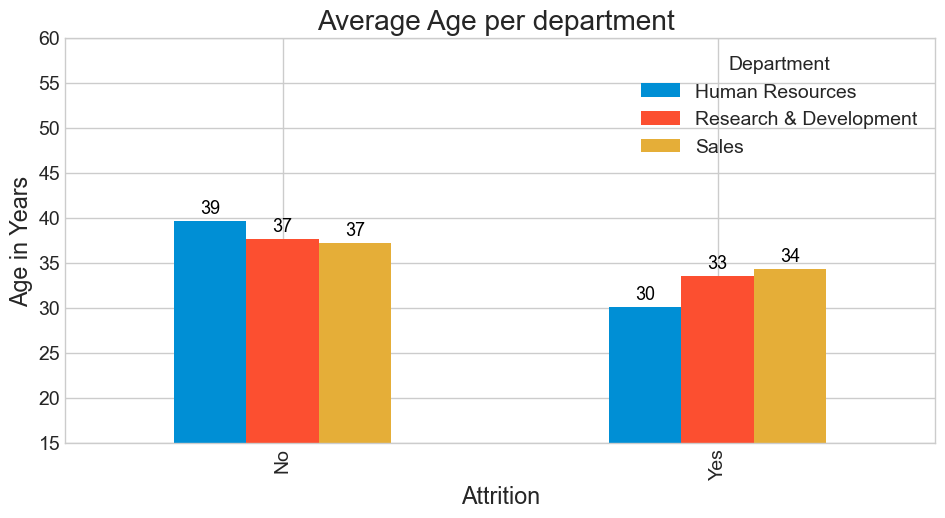

In [90]:
plt.style.use('seaborn-v0_8-whitegrid')
bar = df.groupby(['Attrition','Department'])['Age'].mean().unstack().plot(kind='bar', figsize=(10, 5))
for container in bar.containers:
    bar.bar_label(container,labels=[f'{int(label.get_height())}'for label in container],label_type='edge',color='k',fontsize=13,padding=3)
plt.title('Average Age per department ')
plt.ylabel('Age in Years')
plt.ylim(15,60)
plt.show()

## over all there is more attrition in sales

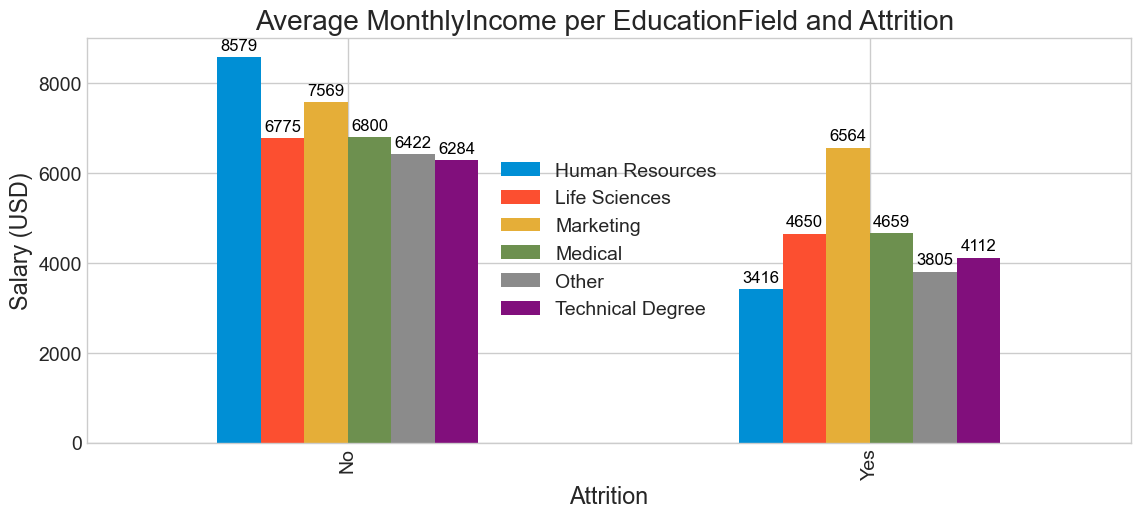

In [92]:
bar = df.groupby(['Attrition','EducationField'])['MonthlyIncome'].mean().unstack().plot(kind='bar', figsize=(12, 5))
for container in bar.containers:
    bar.bar_label(container,labels=[f'{int(label.get_height())}'for label in container],label_type='edge',color='k',fontsize=12,padding=3)
plt.title('Average MonthlyIncome per EducationField and Attrition ')
plt.ylabel('Salary (USD)')
plt.style.use('Solarize_Light2')
plt.legend(loc='center')
plt.show()

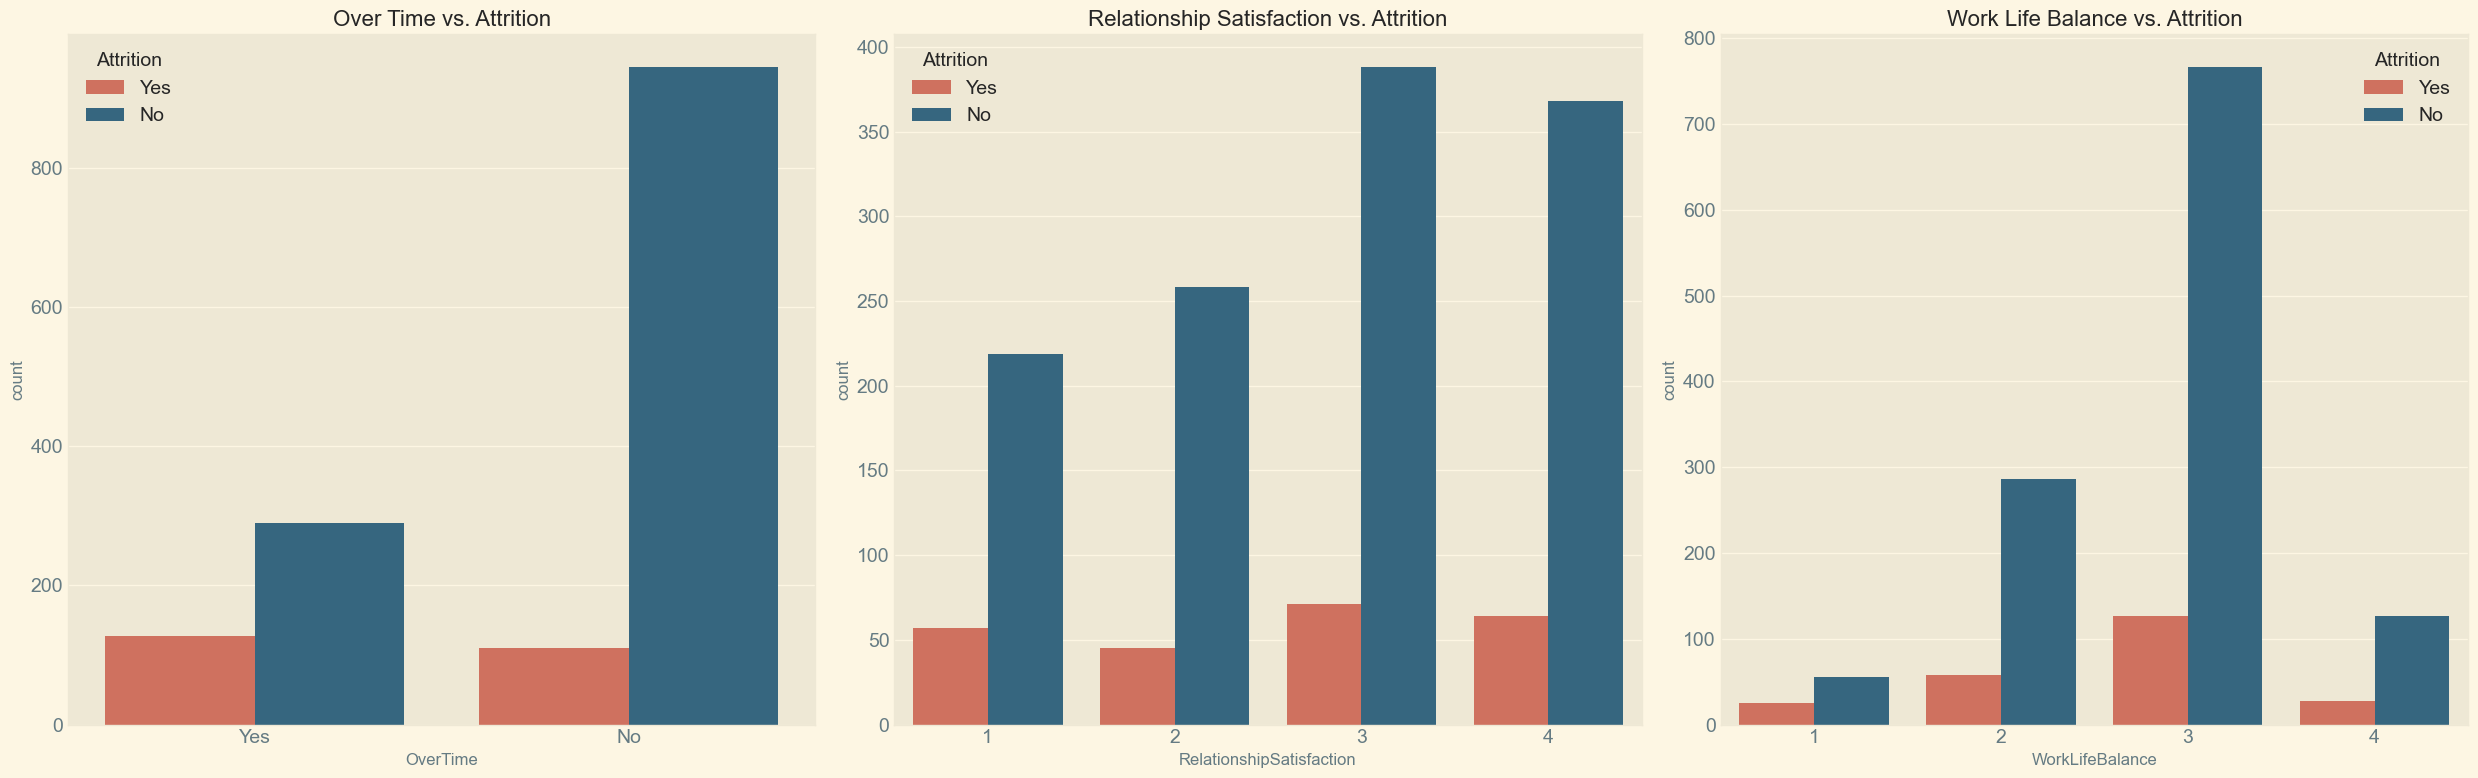

In [94]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))
palette = {"Yes": "#e2644c", "No": "#2a6a8b"}
# Plot 1: Over Time vs. Attrition
sns.countplot(x='OverTime', hue='Attrition', data=df, ax=axes[0],palette=palette)
axes[0].set_title('Over Time vs. Attrition')

# Plot 2: Relationship Satisfaction vs. Attrition
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, ax=axes[1],palette=palette)
axes[1].set_title('Relationship Satisfaction vs. Attrition')

# Plot 3: Work Life Balance vs. Attrition
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, ax=axes[2],palette=palette)
axes[2].set_title('Work Life Balance vs. Attrition')

plt.tight_layout()
plt.show()

# overtime,relation satisfaction and worklife balance has not much impact on attrition job level and department and income has more impact